In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data_stocks.csv")

In [3]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
listCols=data.columns.get_values().tolist()
listAvg=[]
for i in listCols:
    listAvg.append(data[i].mean())
listVar=[]
for i in listCols:
    listVar.append(data[i].var())

In [5]:
dfAvg = pd.DataFrame()
dfVar=pd.DataFrame()
dfAvg=pd.DataFrame(columns=listCols)
dfVar=pd.DataFrame(columns=listCols)

In [6]:
dfAvg.loc[0]=listAvg
dfVar.loc[0]=listVar

In [7]:
dfAvg

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874


In [8]:
dfVar

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1.460930e+13,1564.766925,10.623541,38.897995,47.841289,4.001131,19.573937,88.168125,23.366893,126.607721,...,29.28752,112.501963,2.275403,2.939623,3.38924,136.57504,12.43494,16.30764,31.439231,11.201656


In [9]:
data.isnull().any()

DATE            False
SP500           False
NASDAQ.AAL      False
NASDAQ.AAPL     False
NASDAQ.ADBE     False
NASDAQ.ADI      False
NASDAQ.ADP      False
NASDAQ.ADSK     False
NASDAQ.AKAM     False
NASDAQ.ALXN     False
NASDAQ.AMAT     False
NASDAQ.AMD      False
NASDAQ.AMGN     False
NASDAQ.AMZN     False
NASDAQ.ATVI     False
NASDAQ.AVGO     False
NASDAQ.BBBY     False
NASDAQ.BIIB     False
NASDAQ.CA       False
NASDAQ.CBOE     False
NASDAQ.CELG     False
NASDAQ.CERN     False
NASDAQ.CHRW     False
NASDAQ.CHTR     False
NASDAQ.CINF     False
NASDAQ.CMCSA    False
NASDAQ.CME      False
NASDAQ.COST     False
NASDAQ.CSCO     False
NASDAQ.CSX      False
                ...  
NYSE.USB        False
NYSE.UTX        False
NYSE.V          False
NYSE.VAR        False
NYSE.VFC        False
NYSE.VLO        False
NYSE.VMC        False
NYSE.VNO        False
NYSE.VTR        False
NYSE.VZ         False
NYSE.WAT        False
NYSE.WEC        False
NYSE.WFC        False
NYSE.WHR        False
NYSE.WM   

In [10]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [11]:
#normalize the data
min_max_scalar = preprocessing.MinMaxScaler()
Norm_Data = min_max_scalar.fit_transform(data)

In [12]:
datanormalize = pd.DataFrame(Norm_Data)
datanormalize.columns = data.columns.values.tolist()

In [13]:
datanormalize.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,0.000000,0.213425,0.109930,0.144559,0.051310,0.462916,0.245560,0.061208,0.843663,0.541984,...,0.041803,0.859284,0.055655,0.093943,0.788639,0.026646,0.105184,0.048780,0.509216,0.090988
1,0.000005,0.216458,0.112129,0.145380,0.076781,0.465473,0.242085,0.073063,0.848130,0.541126,...,0.041803,0.859284,0.003591,0.093943,0.788639,0.027408,0.105184,0.040172,0.499357,0.090988
2,0.000009,0.207665,0.108465,0.144973,0.073274,0.462276,0.244884,0.069203,0.845617,0.550777,...,0.051165,0.865832,0.000000,0.106304,0.787318,0.026646,0.097671,0.040890,0.496357,0.092288
3,0.000014,0.217759,0.112862,0.142916,0.067660,0.460358,0.242085,0.068575,0.835846,0.540268,...,0.045722,0.865832,0.028725,0.107540,0.787318,0.026266,0.100676,0.050215,0.496357,0.093588
4,0.000018,0.221102,0.125159,0.143737,0.060539,0.462596,0.238996,0.074444,0.835846,0.543700,...,0.046157,0.876019,0.003591,0.103832,0.788639,0.026646,0.103681,0.052367,0.496142,0.081456


In [14]:
#drop the date col
datanormalize.drop("DATE",axis=1,inplace=True)

In [15]:
lKmeans = []
for i in range(1,25):
    a = kmeans(datanormalize,i)
    lKmeans.append(a)

In [16]:
K = range(1,25)
KM = [kmeans(datanormalize,k) for k in K]
centroids = [cent for (cent,var) in KM]

In [17]:
D_k = [cdist(datanormalize, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/datanormalize.shape[0] for d in dist]

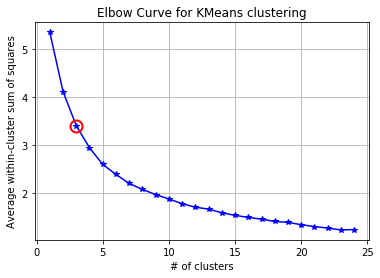

In [18]:
kIdx = 2

# let's look at an elbow curve to see the best # of clusters
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('# of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow Curve for KMeans clustering')
plt.show()

Answer to Problem 2 is 3 unique patterns/ideal # of clusters

In [19]:
#so 3 is the ideal # of clusters.  This is the answer for Question 2.
cust_KMeans = KMeans(n_clusters=3)
cust_KMeans.fit(datanormalize)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
#lets see what the distribution within the clusters is
pd.Series(cust_KMeans.labels_).value_counts()

2    16360
0    14361
1    10545
dtype: int64

In [21]:
#looks like the clusters are close to being evenly populated
#let's add the cluster info to the data
data['Cluster'] =  pd.Series(cust_KMeans.labels_)

In [22]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Cluster
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,0
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,0
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,0
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,0
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,0


In [23]:
for col in data.columns:
    print(col + " " + str(np.mean(data.loc[data.Cluster==0,col])) + " cluster 0")
    print(col + " " + str(np.mean(data.loc[data.Cluster==1,col])) + " cluster 1")
    print(col + " " + str(np.mean(data.loc[data.Cluster==2,col])) + " cluster 2")

DATE 1493425951.0382285 cluster 0
DATE 1502660500.916074 cluster 1
DATE 1498377263.6295843 cluster 2
SP500 2375.0688346006414 cluster 0
SP500 2459.7294293409245 cluster 1
SP500 2437.7122163508716 cluster 2
NASDAQ.AAL 44.52867033632762 cluster 0
NASDAQ.AAL 47.793283584637436 cluster 1
NASDAQ.AAL 50.444754822738204 cluster 2
NASDAQ.AAPL 147.26144207227972 cluster 0
NASDAQ.AAPL 157.9027289141778 cluster 1
NASDAQ.AAPL 148.45421750611354 cluster 2
NASDAQ.ADBE 133.46153867418585 cluster 0
NASDAQ.ADBE 149.1600417449028 cluster 1
NASDAQ.ADBE 143.15965105745687 cluster 2
NASDAQ.ADI 78.62483121648921 cluster 0
NASDAQ.ADI 79.2257806922711 cluster 1
NASDAQ.ADI 80.31097888141785 cluster 2
NASDAQ.ADP 100.81127640136495 cluster 0
NASDAQ.ADP 109.12908514936048 cluster 1
NASDAQ.ADP 102.18246726772458 cluster 2
NASDAQ.ADSK 92.45759227073307 cluster 0
NASDAQ.ADSK 110.27967395922194 cluster 1
NASDAQ.ADSK 107.55855287897296 cluster 2
NASDAQ.AKAM 55.426418738249765 cluster 0
NASDAQ.AKAM 46.42185092460913 cl

NASDAQ.TRIP 43.87702416266291 cluster 0
NASDAQ.TRIP 40.266129217638834 cluster 1
NASDAQ.TRIP 37.829799468215526 cluster 2
NASDAQ.TROW 70.62677363693423 cluster 0
NASDAQ.TROW 83.30464647700371 cluster 1
NASDAQ.TROW 74.7662709474325 cluster 2
NASDAQ.TSCO 63.031529921315204 cluster 0
NASDAQ.TSCO 56.03421357989596 cluster 1
NASDAQ.TSCO 53.67949579462146 cluster 2
NASDAQ.TXN 80.04275916022495 cluster 0
NASDAQ.TXN 81.41499197724049 cluster 1
NASDAQ.TXN 80.36914558068446 cluster 2
NASDAQ.ULTA 287.70705459926046 cluster 0
NASDAQ.ULTA 239.6785273779033 cluster 1
NASDAQ.ULTA 284.6997213447432 cluster 2
NASDAQ.VIAB 40.34711045191883 cluster 0
NASDAQ.VIAB 30.972084039829475 cluster 1
NASDAQ.VIAB 34.87733129584364 cluster 2
NASDAQ.VRSK 80.07901207436713 cluster 0
NASDAQ.VRSK 82.35236627785677 cluster 1
NASDAQ.VRSK 83.2280466442529 cluster 2
NASDAQ.VRSN 88.98774525450725 cluster 0
NASDAQ.VRSN 100.15869757230884 cluster 1
NASDAQ.VRSN 94.08478613691946 cluster 2
NASDAQ.VRTX 115.82590356521173 cluster 

NYSE.COO 245.22507904219893 cluster 1
NYSE.COO 240.47016017726216 cluster 2
NYSE.COP 48.00484744098574 cluster 0
NYSE.COP 44.270974404931444 cluster 1
NYSE.COP 44.325992114914854 cluster 2
NYSE.COTY 18.208660434509987 cluster 0
NYSE.COTY 18.836232356566928 cluster 1
NYSE.COTY 18.886813808068467 cluster 2
NYSE.CPB 57.13362462920327 cluster 0
NYSE.CPB 52.73609719298213 cluster 1
NYSE.CPB 54.41074828239629 cluster 2
NYSE.CRM 85.92061902374559 cluster 0
NYSE.CRM 91.48145174964404 cluster 1
NYSE.CRM 88.81900418704113 cluster 2
NYSE.CSRA 28.827135770489637 cluster 0
NYSE.CSRA 32.12374719772424 cluster 1
NYSE.CSRA 31.925681210269122 cluster 2
NYSE.CTL 24.90672828493833 cluster 0
NYSE.CTL 21.421883366524508 cluster 1
NYSE.CTL 24.58129265892426 cluster 2
NYSE.CVS 79.19421172620373 cluster 0
NYSE.CVS 78.31646659080151 cluster 1
NYSE.CVS 78.37738028117299 cluster 2
NYSE.CVX 106.59942211545113 cluster 0
NYSE.CVX 108.2608634613566 cluster 1
NYSE.CVX 104.69385138141861 cluster 2
NYSE.CXO 130.0041250

NYSE.JEC 53.999811949028775 cluster 0
NYSE.JEC 52.35588683736401 cluster 1
NYSE.JEC 53.570630904645576 cluster 2
NYSE.JNJ 124.3607313070112 cluster 0
NYSE.JNJ 132.6381842105265 cluster 1
NYSE.JNJ 132.37618114303163 cluster 2
NYSE.JNPR 29.195602861917425 cluster 0
NYSE.JNPR 27.753726733048786 cluster 1
NYSE.JNPR 28.96593878361824 cluster 2
NYSE.JPM 86.40541780516556 cluster 0
NYSE.JPM 92.16903264106234 cluster 1
NYSE.JPM 88.50849758557428 cluster 2
NYSE.JWN 45.744544502471825 cluster 0
NYSE.JWN 45.90936983404444 cluster 1
NYSE.JWN 45.89891981051324 cluster 2
NYSE.K 71.52470896873474 cluster 0
NYSE.K 68.60383328591753 cluster 1
NYSE.K 69.92625727383754 cluster 2
NYSE.KEY 18.020258443005382 cluster 0
NYSE.KEY 17.849913921289808 cluster 1
NYSE.KEY 18.483563282396183 cluster 2
NYSE.KIM 20.596662098739692 cluster 0
NYSE.KIM 19.971461678520775 cluster 1
NYSE.KIM 18.43319768337423 cluster 2
NYSE.KMB 129.92052873058913 cluster 0
NYSE.KMB 122.02235520151876 cluster 1
NYSE.KMB 128.61809413814066 

NYSE.PXD 177.31773838869236 cluster 0
NYSE.PXD 138.00050117591348 cluster 1
NYSE.PXD 161.7090864364295 cluster 2
NYSE.RAI 64.61502472669031 cluster 0
NYSE.RAI 65.68999999998803 cluster 1
NYSE.RAI 65.83412108801816 cluster 2
NYSE.RCL 102.54664139683865 cluster 0
NYSE.RCL 118.96471058321441 cluster 1
NYSE.RCL 111.41875040342308 cluster 2
NYSE.REG 64.140010417102 cluster 0
NYSE.REG 65.67033383594088 cluster 1
NYSE.REG 62.32812935819078 cluster 2
NYSE.RF 14.080811767982693 cluster 0
NYSE.RF 14.472895410146874 cluster 1
NYSE.RF 14.280234865525548 cluster 2
NYSE.RHI 46.43352916927764 cluster 0
NYSE.RHI 44.19404182076817 cluster 1
NYSE.RHI 47.70954814180909 cluster 2
NYSE.RHT 87.17458004317177 cluster 0
NYSE.RHT 101.0459810526314 cluster 1
NYSE.RHT 94.28168993887456 cluster 2
NYSE.RIG 11.34281148248721 cluster 0
NYSE.RIG 8.685058909437046 cluster 1
NYSE.RIG 8.571450287286021 cluster 2
NYSE.RJF 74.635999171367 cluster 0
NYSE.RJF 80.63896033191124 cluster 1
NYSE.RJF 78.79117781784815 cluster 2


In [43]:
#as for Problem 3 of which stocks move together lets build a new dataframe for the movement of each stock and then
#rerun the clustering on that.  we'll work from the normalized data.
list_ = []
dfMovement = pd.DataFrame(index=(datanormalize.index-1))
for col in datanormalize.columns:
    for i in range(len(datanormalize[col])):
        if i == 0:
            result= 0
        else: 
            result = datanormalize[col][i]-datanormalize[col][i-1]
        list_.append(result)
    dfMovement[col]=list_
    list_= []

In [44]:
dfMovement.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.003034,0.002199,0.000821,0.025471,0.002558,-0.003475,0.011856,0.004467,-0.000858,0.001929,...,0.000000,0.000000,-0.052065,0.000000,0.000000,0.000761,0.000000,-0.008608,-0.009859,0.000000
1,-0.008793,-0.003664,-0.000407,-0.003507,-0.003197,0.002799,-0.003860,-0.002513,0.009651,-0.009643,...,0.009362,0.006548,-0.003591,0.012361,-0.001321,-0.000761,-0.007513,0.000717,-0.003000,0.001300
2,0.010093,0.004397,-0.002057,-0.005615,-0.001918,-0.002799,-0.000629,-0.009771,-0.010509,-0.006750,...,-0.005443,0.000000,0.028725,0.001236,0.000000,-0.000381,0.003005,0.009326,0.000000,0.001300
3,0.003343,0.012298,0.000821,-0.007121,0.002238,-0.003089,0.005870,0.000000,0.003432,0.008679,...,0.000435,0.010186,-0.025135,-0.003708,0.001321,0.000381,0.003005,0.002152,-0.000214,-0.012132


In [45]:
Move_KMeans = KMeans(n_clusters=3)
Move_KMeans.fit(dfMovement)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
#ah we're seeing a better distribution of which stocks move together than before.
pd.Series(Move_KMeans.labels_).value_counts()

2    28329
1     6578
0     6359
dtype: int64

In [47]:
#let's add the cluster info to the data
dfMovement['Cluster'] =  pd.Series(Move_KMeans.labels_)

In [48]:
#answer to problem 3
dfMovement.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Cluster
-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
0,0.003034,0.002199,0.000821,0.025471,0.002558,-0.003475,0.011856,0.004467,-0.000858,0.001929,...,0.000000,-0.052065,0.000000,0.000000,0.000761,0.000000,-0.008608,-0.009859,0.000000,2.0
1,-0.008793,-0.003664,-0.000407,-0.003507,-0.003197,0.002799,-0.003860,-0.002513,0.009651,-0.009643,...,0.006548,-0.003591,0.012361,-0.001321,-0.000761,-0.007513,0.000717,-0.003000,0.001300,0.0
2,0.010093,0.004397,-0.002057,-0.005615,-0.001918,-0.002799,-0.000629,-0.009771,-0.010509,-0.006750,...,0.000000,0.028725,0.001236,0.000000,-0.000381,0.003005,0.009326,0.000000,0.001300,2.0
3,0.003343,0.012298,0.000821,-0.007121,0.002238,-0.003089,0.005870,0.000000,0.003432,0.008679,...,0.010186,-0.025135,-0.003708,0.001321,0.000381,0.003005,0.002152,-0.000214,-0.012132,1.0


In [66]:
#for problem 1 lets look at the variance of each stock and bucket those into groups.  we'll use the normalized data
#for stocks variance will group them based on volatility
list2 = []
for col in datanormalize.columns:
    list2.append(datanormalize[col].var())

In [69]:
dfVol = pd.DataFrame(columns=datanormalize.columns)
dfVol.loc[0]=list2

In [70]:
dfVol.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,0.059986,0.057059,0.065604,0.065191,0.016357,0.02918,0.067022,0.072847,0.05824,0.055753,...,0.055533,0.095291,0.073341,0.044915,0.059144,0.197902,0.070192,0.08392,0.057762,0.084114


In [72]:
#lets look at the min & max to see parameters for our bucket
print(max(list2))
print(min(list2))

0.19790245859142425
0.01635721220520018


In [74]:
#lets go with buckets of less than <0.05, 0.050 & <.1, >0.1  Low, medium & high volatility
listVol = []
for col in datanormalize.columns:
    if datanormalize[col][0] < 0.05:
        listVol.append('Low')
    elif datanormalize[col][0] >= 0.05 and datanormalize[col][0] < 0.1:
        listVol.append('Medium')
    else:
        listVol.append('High')

In [75]:
dfVol.loc[1]=listVol

In [76]:
#answer to Problem 1.  Volatility of each normalized stock grouped into similar performance.
dfVol.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,0.0599861,0.0570587,0.0656038,0.0651906,0.0163572,0.0291796,0.0670219,0.0728467,0.0582402,0.0557535,...,0.0555328,0.0952914,0.0733412,0.0449153,0.059144,0.197902,0.070192,0.08392,0.057762,0.0841144
1,High,High,High,Medium,High,High,Medium,High,High,High,...,Low,High,Medium,Medium,High,Low,High,Low,High,Medium
